In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt


In [4]:
cifar_mnist = datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()

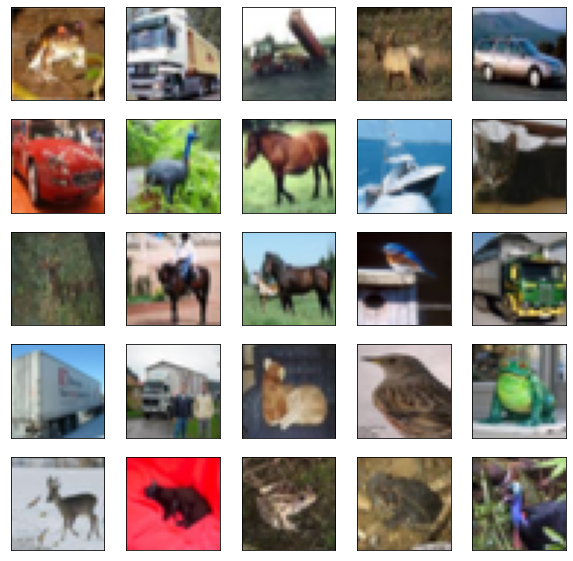

In [5]:
import warnings
warnings.filterwarnings(action='ignore') 

class_names = [
    'Airplane',
    'Car',
    'Birs',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

In [6]:
batch_size = 64
num_classes = 10
epochs = 35
train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [7]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same',
          input_shape=train_images.shape[1:], activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7953 - accuracy: 0.3429 - val_loss: 1.2247 - val_accuracy: 0.5587
Epoch 2/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2992 - accuracy: 0.5327 - val_loss: 1.0657 - val_accuracy: 0.6210
Epoch 3/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1445 - accuracy: 0.5892 - val_loss: 1.0165 - val_accuracy: 0.6453
Epoch 4/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0580 - accuracy: 0.6245 - val_loss: 0.9624 - val_accuracy: 0.6634
Epoch 5/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0158 - accuracy: 0.6378 - val_loss: 0.9259 - val_accuracy: 0.6821
Epoch 6/35
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9767 - accuracy: 0.6538 - val_loss: 0.9085 - val_accuracy: 0.6828
Epoch 7/35
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9510 - accuracy: 0.6651 - val_loss: 0.8829 - val_accuracy:

In [10]:
loss, acc = model.evaluate(test_images, test_labels)

print("\nLoss: {}, Acc: {}".format(loss, acc))

313/313 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.7363

Loss: 0.7752572298049927, Acc: 0.736299991607666


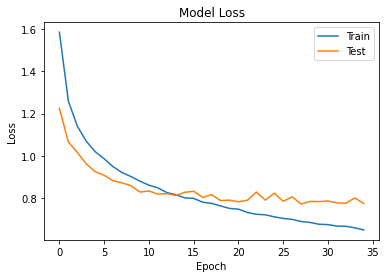

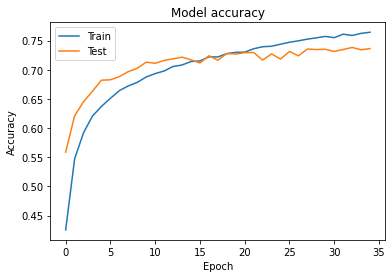

In [23]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

plt_show_loss(history)
plt.show()

plt_show_acc(history)
plt.show()

In [24]:
predictions = model.predict(test_images)


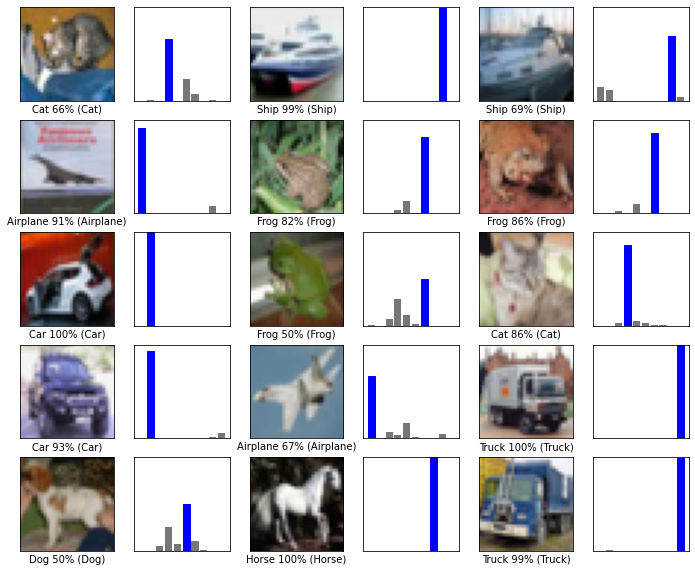

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)],
                                        color=color))
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()